In [1]:
!pip install seaborn --upgrade
# Trabajarlos como semanas.

In [2]:
## Sinadef
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
sns.__version__

'0.11.1'

In [4]:
def quitar_no_años(row):
    if row['TIEMPO EDAD'] != 'AÑOS' or row['EDAD'] == 'SIN REGISTRO':
        return 0 
    else:
        return int(row['EDAD'])
    
def a_fecha(fecha):
    return datetime.datetime.strptime(fecha, '%Y-%m-%d').date()  


In [5]:
%%time
name_file = 'SINADEF_DATOS_ABIERTOS_21052022.xlsx'
df = pd.read_excel(name_file, header = 3)
df.drop(list(df.columns[-4:]), axis = 1, inplace = True)

Wall time: 3min 47s


In [6]:
df.head()

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,PROVINCIA DOMICILIO,DISTRITO DOMICILIO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA,DEBIDO A (CAUSA A),CAUSA A (CIE-X),DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
0,1,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,92-33-12-08-06-000,PERU,LA LIBERTAD,ASCOPE,PAIJAN,2021-01-19,2021,1,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,ASFIXIA DE NACIMIENTO SEVERA,P210,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,2,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,MARISCAL CACERES,JUANJUI,2020-01-17,2020,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,INSUFICIENCIA RESPIRATORIA AGUDA,J960,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO
2,3,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,LAMAS,TABALOSOS,2020-01-03,2020,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFIC...,I219,HIPERLIPIDEMIA NO ESPECIFICADA,E785,ATEROSCLEROSIS GENERALIZADA Y LA NO ESPECIFICADA,I709,HIPERTENSION ESENCIAL,I10X,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
3,4,IGNORADO,MASCULINO,59,AÑOS,SOLTERO,IGNORADO,92-33-24-01-01-000,PERU,CALLAO,CALLAO,CALLAO,2021-01-30,2021,1,VIA PUBLICA,SIN REGISTRO,NO SE CONOCE,SI SE REALIZÓ NECROPSIA,TRAUMATISMOS MULTIPLES,SIN REGISTRO,SHOCK HIPOVOLEMICO,SIN REGISTRO,SUCESO DE TRANSITO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
4,5,IGNORADO,MASCULINO,38,AÑOS,IGNORADO,IGNORADO,93-32-00-00-00-000,FILIPINAS,EXTRANJERO,EXTRANJERO,EXTRANJERO,2020-01-19,2020,1,OTRO,SIN REGISTRO,SIN REGISTRO,SI SE REALIZÓ NECROPSIA,EDEMA Y CONGESTION CEREBRAL Y PULMONAR,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [6]:
#aux = df.loc[(df['MUERTE VIOLENTA'] == 'SIN REGISTRO') | (df['MUERTE VIOLENTA'] == 'NO SE CONOCE' )]
#aux = aux.loc[(df['AÑO'] == 2018)]
#pd.pivot_table(aux, index = ['FECHA'], columns = ['DEPARTAMENTO DOMICILIO'], aggfunc = ['size'])

In [7]:
df_c = df.copy()
df_c['new_EDAD'] = df_c.apply(lambda row: quitar_no_años(row), axis = 1)
df_c.drop(['EDAD', 'TIEMPO EDAD'], axis =1, inplace = True)
df_c['FECHA'] = df_c['FECHA'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
bins = list(range(0,(math.ceil(df_c['new_EDAD'].max() / 10) + 1)*10, 10))
df_c['new_Edad'] = pd.cut(df_c['new_EDAD'], bins)
df_c['new_Edad'] = df_c['new_Edad'].cat.codes

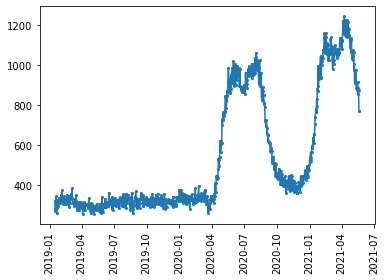

In [8]:
serie = (df_c[df_c['FECHA'] > a_fecha('2019-01-15')]['FECHA']).value_counts().sort_index()
serie = serie[:-1]
plt.plot(serie, '-o', markersize = 2)
plt.xticks(rotation = 90)
plt.show()

In [9]:
# AGRUPAR DATOS POR FECHAS:
# TIPO DE SEGURO
# SEXO
# new_EDAD (por grupos)
# ESTADO CIVIL
# PAIS DOMICILIO
# DEPARTAMENTO DOMICILIO

def a_fecha(txt):
    return datetime.datetime.strptime(txt, '%Y-%m-%d').date()

def quitar_neg(x):
    return max(0, x)

def df_por_dia(df, columna, tratado = 'Y'):

    # Esta parte crea y limpia la tabla pivot
    df_counts = pd.pivot_table(df, index = ['FECHA'], columns = columna, aggfunc = 'size')
    df_counts = df_counts[:-1]
    df_counts = df_counts.loc[df_counts.index >= a_fecha('2019-01-01')]
    df_counts = df_counts.fillna(0)
        
    if tratado == 'N':
        return df_counts
        
    # Filtramos por fechas y creamos 2 data sets
    # Un data set "base" que vamos a usar para obtener el residuo (del año 2019)
    # Un data set que tienes los valores a tratar (a partir del 2020-01-01)
    df_datos = df_counts.loc[df_counts.index >= a_fecha('2020-01-01')]
    df_datos_tratar = df_datos.drop(a_fecha('2020-02-29')) # Ignoramos el día añadido por el año bisiesto
    df_datos_base = df_counts.loc[df_counts.index < a_fecha('2020-01-01')]
    #df_datos_base_transformados = (df_datos_base + df_datos_base.median())/2
    df_datos_base_transformados = (df_datos_base*0 + df_datos_base.median())
        
    df_datos_base_transformados = df_datos_base_transformados.applymap(math.ceil) # Esto es lo que vamos a usar

    # Con este codigo creamos el data set de covid, haciendo la diferencia entre los datos
    # y los datos bases (año 2019)
    dia_sumar = timedelta(days = 1)
    ini = df_datos_tratar.first_valid_index()
    fin = df_datos_tratar.last_valid_index()
    df_new_solo_covid = pd.DataFrame(columns = list(df_datos_tratar.columns))
    df_new_solo_covid.index.name = 'FECHA'
    año = timedelta(days = 365)
    dia = ini
    while dia <= fin:
        if dia == a_fecha('2020-02-29'): 
            año = año + dia_sumar
        elif (dia.year == 2020) & (dia != a_fecha('2020-02-29')):
            #print(dia)
            #print(dia - año)
            #print(dia.year)
            assert(dia.day == (dia - año).day)
            new_row = pd.Series(df_datos_tratar.loc[dia] - df_datos_base_transformados.loc[dia - año], name = dia)
        elif dia.year == 2021:
            #print(dia)
            #print(dia - (año*2 - dia_sumar))
            #print(dia.year)
            assert(dia.day == (dia - (año*2 - dia_sumar)).day)
            new_row = pd.Series(df_datos_tratar.loc[dia] - df_datos_base_transformados.loc[dia - (año*2 - dia_sumar)], name = dia)
        df_new_solo_covid = df_new_solo_covid.append(new_row, ignore_index = False)
        dia = dia + dia_sumar

    df_new_solo_covid = df_new_solo_covid.applymap(quitar_neg)
    return df_new_solo_covid
    
def df_por_semana(df):
    df_aux = df.copy()
    df_aux['FECHA_index'] = df_aux.index
    df_aux.loc[: , ('SEMANA_DEL_AÑO')] = df_aux['FECHA_index'].apply(lambda x: (x.isocalendar()[:2]))
    df_return = pd.pivot_table(df_aux, index = ['SEMANA_DEL_AÑO'], aggfunc = 'sum')
    return df_return

In [12]:
lista = ['SEXO', 'TIPO SEGURO', 'new_Edad', 'PAIS DOMICILIO']

In [13]:
for columna in lista:
    data_frame = df_por_dia(df_c, columna)
    data_frame.to_csv('Por_dia_' + columna + '.csv')
    data_frame_semana = df_por_semana(data_frame)
    data_frame_semana.to_csv('Por_semana' + columna + '.csv')